# Рынок заведений общественного питания Москвы

***Цель исследования*** - произвести исследования рынка общественного питания Москвы, чтобы принять решение об оптимальном местоположении для открытия нового ресторана

***Описание исследования***

Было принято решение открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Для открытия кафе обратились к инвесторам. Их интересует текущее положение дел на рынке.

***Ход исследования***

Необходимо произвести обзор данных, предобработку, после чего произвести исследования рынка и составить презентацию для инвесторов. 

### Обзор данных и предобработка

Импортируем библиотеки необходые для работы:

In [2]:
# импортируем необходимые для работы библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from termcolor import colored
import seaborn as sns

Добавляем функцию для обзора данных:

In [3]:
# функция для обзора данных в таблице
def view(data, name):
    print(colored('Обзор данных таблицы', 'blue'), name)
    print()
    print('Первые 5 строк данных')
    display(data.head()) # Выводим первые 5 строк
    print()
    print('Информация по таблице')
    display(data.info()) # Выводим инфо по датасету
    print()
    print('Пропуски')
    display(data.isna().sum())
    print()
    print('Количество явных дубликатов:', data.duplicated().sum())
    print()

Открываем файл и подключае функцию по его обзору:

In [4]:
# открываем файл, выводим с помощью функции
data = pd.read_csv('/datasets/rest_data.csv')
view(data, colored('о ресторанах Москвы', 'blue'))

Обзор данных таблицы о ресторанах Москвы

Первые 5 строк данных


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50



Информация по таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None


Пропуски


id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64


Количество явных дубликатов: 0



Описание данных:

- id — идентификатор объекта;
- object_name — название объекта общественного питания;
- chain — сетевой ресторан;
- object_type — тип объекта общественного питания;
- address — адрес;
- number — количество посадочных мест

Явных дубликатов нет, пропусков нет, типы данных корректны. 

В столбце с названиями заведений использованы скобки, скачет регистр букв, упоминается тип заведения перед названием. Так как у нас нет документации к этим данным, то можно предположить, что названия заведений вносят в единый реестр их владельцы. Нам не известны юр. форма заведений, франшизные ли эти точки, входит ли слово "кафе" в официальное название или его можно убрать. 

Также далее мы будем исследовать именно типы заведений, поэтому имеет смысл не обрабатывать названия заведений. Доверится данным, которые вносили владельцы. 

Проверим какое минимальное/максимальное количество посадочных мест есть в заведениях:

In [5]:
# проверяем минимальное количество посадочных мест в заведениях
data['number'].min()

0

In [6]:
# проверяем максимальное количество посадочных мест в заведениях
data['number'].max()

1700

Минимальное количество посадочных мест - 0, максимальное - 1700. Будем иметь ввиду эти данные при дальнейшем анализе. Однако в целом такое возможно. Например, во всяких МакАвто или небольших вагончиках может продаваться еда на вынос. Причем даже если это крупный ресторан он может иметь такую маленькую точку. В свою очередь в датасете есть столовые и крупные рестораны, посмотрим, что это за места с количеством посадочных мест более 1000:

In [7]:
# выделяем места с количеством посадочных мест более 1000
max_number = data[data['number'] > 1000]
max_number

,id,object_name,chain,object_type,address,number
2313,26560,Ресторан «АЛЬФА»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корп...",1040
3686,27026,РУМ СЕРВИС,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
4480,27024,РУМ СЕРВИС,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, с...",1200
8148,80291,Банкетный зал Шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом...",1500
8345,27750,СТОЛОВАЯ-БУФЕТ,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,нет,столовая,"город Москва, проспект Вернадского, дом 84, ст...",1288
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


В дата сете присутствуют большие рестораны. Также за заведения общественного питания Москвы приняты, например, room serves в крупных гостиницах и бар на большом стадионе. 

Столовая буфет с аномально огромным количеством мест - это совокупное количество мест во всех трапезных Храма Христа Спасителя. 

Не стоит это править, так как, по сути, информация корректна. Попробуем все названия привести к одному регистру и проверить наличие не явных дубликатов:

In [8]:
# делаем единый регистр
data['object_name'] = data['object_name'].str.lower()
# удаляем возможные не явные дубликаты
data = data.drop_duplicates(subset = ['object_name', 'chain', 'object_type', 'address', 'number'])

# приверяем информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.7+ KB


Супер! У нас было некоторое количество не явных дубликатов, они успешно удалены. 

#### Вывод

В целом данные у нас не идеальные. 

Однако явных дубликатов и пропусков в данных нет. Типы данных в целом соответствуют необходимым для исследования. 
В названиях точек видим разницу в регистре букв, упоминается "кафе" в названиях заведений. Однако вероятно, что это не ошибка. Нам не известно как именно и кем данные вносились в реестр заведений, возможно это сделали владельцы. В этом случае в официальных документах название заведения может быть прописано как "Кафе «Академия»". В связи с этим обработку названий производить смысла не имеет. 

Для проверки на не явные дубликаты мы привели все названия к единому регистру и удалили все строки для информация по всех столбцах кроме id повторялась.

### Анализ данных

#### Исследование соотношения видов объектов по их количеству

Проверим какое количество объектов разных типов находится в нашем городе:

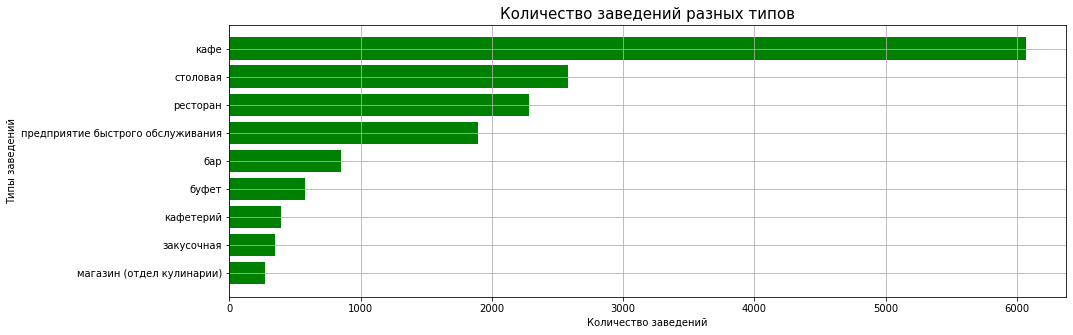

In [9]:
# группируем данные по видам объектов
type_of_object_count = data.groupby('object_type')['id'].count().reset_index(name='counts').sort_values(by='counts')

# строим диаграмму
plt.figure(figsize=(15,5))
plt.barh(type_of_object_count['object_type'], type_of_object_count['counts'], color='green')
plt.grid(which='major')
plt.title("Количество заведений разных типов", fontsize=15)
plt.xlabel('Количество заведений')
plt.ylabel('Типы заведений')
plt.show()

С большим отрывом лидируют кафе - их более 6 тыс. На втором месте, но сильно отстают столовые (~2,5 тыс) и на третьем месте рестораны (~2,3 тыс). 

#### Исследуем соотношение сетевых и несетевых заведений

Проверим в нашем городе больше сетевых или не сетевых заведений:

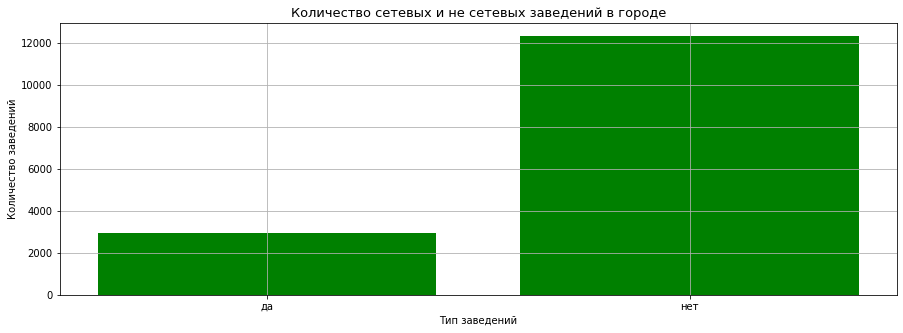

In [10]:
# группируем данные по видам объектов
chain_of_object_count = data.groupby('chain')['id'].count().reset_index(name='counts').sort_values(by='counts')

# строим диаграмму
plt.figure(figsize=(15,5))
plt.bar(chain_of_object_count['chain'], chain_of_object_count['counts'], color='green')
plt.grid(which='major')
plt.title("Количество сетевых и не сетевых заведений в городе", fontsize=13)
plt.ylabel('Количество заведений')
plt.xlabel('Тип заведений')
plt.show()

Большая часть заведений Москвы не являются сетевыми. Таковых более 12 тыс. Лишь примерно 3 тыс. заведений будут являться сетевыми. Отметим, что в нашем реестре заведений есть столовые или отделы кулинарии, которые изначально сетевыми быть могут вряд ли. Рассмотрим соотношение сетевых и не сетевых заведений по типу заведения:

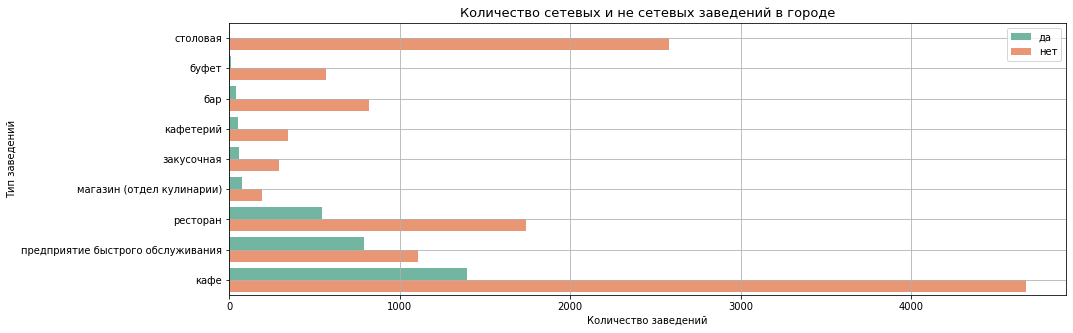

In [11]:
# группируем данные по видам объектов
type_chain_of_object_count = (data.groupby(['object_type','chain'])['id'].count().reset_index(name='counts')
                              .sort_values(by='counts'))

# строим диаграмму
plt.figure(figsize=(15,5))
sns.barplot(y="object_type", x="counts",
                hue="chain",
                data=type_chain_of_object_count, palette="Set2")

plt.grid(which='major')
plt.title("Количество сетевых и не сетевых заведений в городе", fontsize=13)
plt.xlabel('Количество заведений')
plt.ylabel('Тип заведений')
plt.legend()

 
plt.show()

В основном сетевой формат заведений характерен для кафе, предприятий быстрого обслуживания и ресторанов, меньше всего - для буфетов и столовых. 

#### Исследование количества посадочных мест в заведениях разных типов

Посмотрим какое количество посадочных мест характерно для разных типов заведений. Начнем с сетевых и не сетевых:

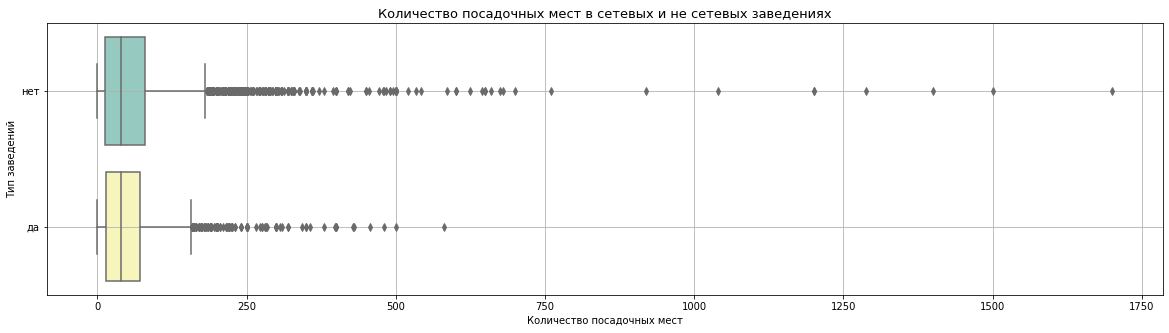

In [12]:
# строим боксплот количества посадочных мест по типам заведений (сетевые и не сетевые)
plt.figure(figsize=(20,5))

sns.boxplot(x='number', y='chain', data=data, palette="Set3") 

plt.grid(which='major')
plt.title("Количество посадочных мест в сетевых и не сетевых заведениях", fontsize=13)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип заведений')

 
plt.show()

Для сетей в отличии от не сетевых заведений характерен меньший разброс значений количества посадочных мест. У не сетевых заведений есть существенные выбросы по этому значению. Так данные с максимальным количеством мест, которые мы видели при первичной обработке данных соответствуют как раз не сетевому заведению. 

Обрежем выбросы, чтобы лучше увидеть сами боксплоты:

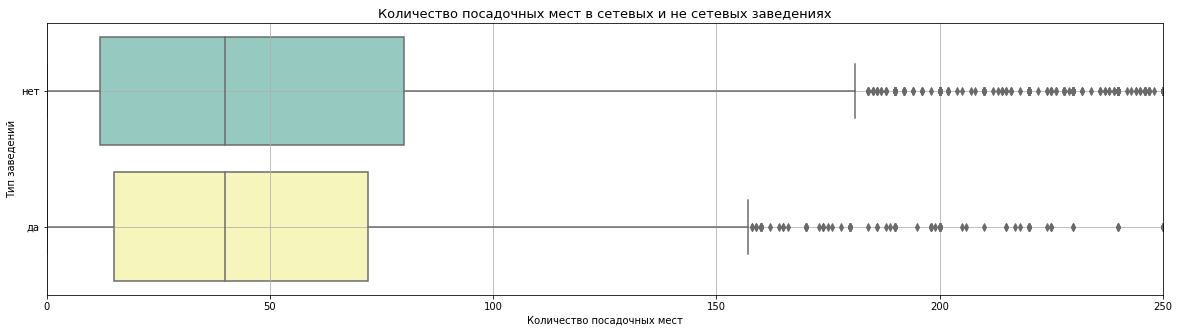

In [13]:
# строим боксплот количества посадочных мест по типам заведений с обрезанными данными по выбросам
plt.figure(figsize=(20,5))

sns.boxplot(x='number', y='chain', data=data, palette="Set3") 

plt.grid(which='major')
plt.title("Количество посадочных мест в сетевых и не сетевых заведениях", fontsize=13)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип заведений')
plt.xlim(0,250)
 
plt.show()

Медианные значения количества посадочных мест у сетевых и не сетевых заведений, как ни странно, оказались одинаковыми. 

Для сетевых заведений в основном характерно не слишком большое количество посадочных мест (до 70). Однако есть отдельные выбросы, это заведения с большим количеством посадочных. 

Посмотрим какое количество посадочных мест имеют заведения по типам:

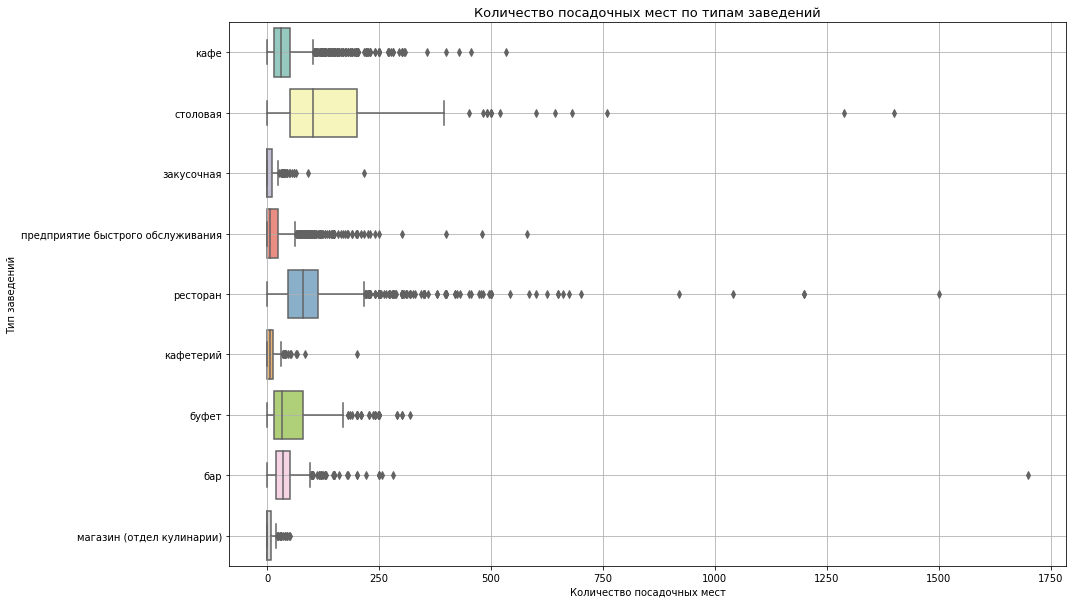

In [14]:
# строим боксплот количества посадочных мест по типам заведений
plt.figure(figsize=(15,10))

sns.boxplot(y='object_type', x='number', data=data, palette="Set3") 

plt.grid(which='major')
plt.title("Количество посадочных мест по типам заведений", fontsize=13)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип заведений')
 
plt.show()

А вот и наш бар на 1700 мест :)

Большие выбросы имеют рестораны и столовые. В остальных заведениях разброс данных в целом меньше. Уберем выбросы, чтобы боксплоты были видны лучше:

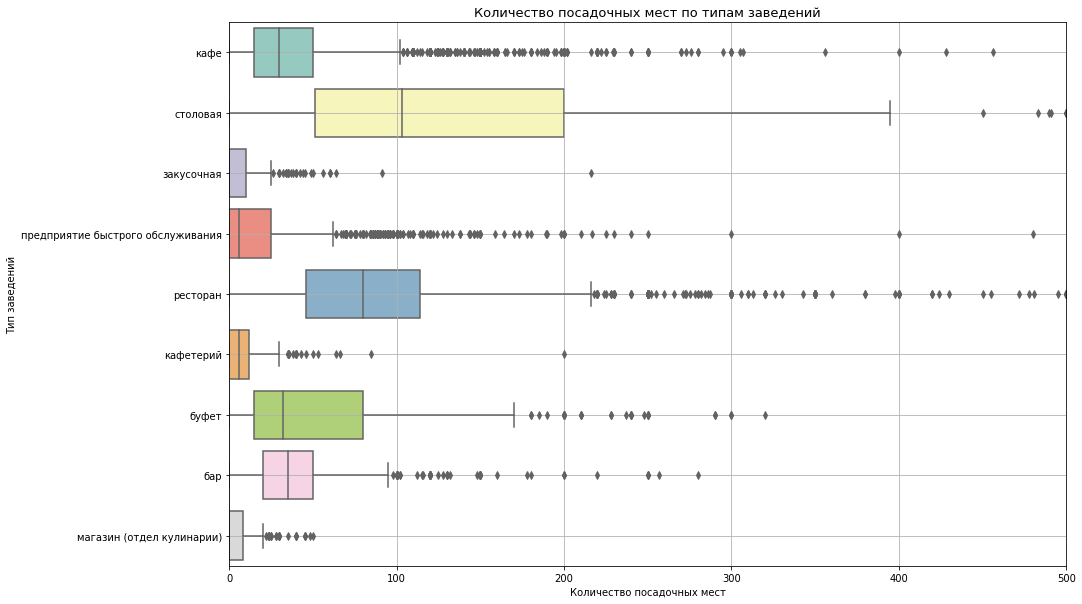

In [15]:
# строим боксплот количества посадочных мест по типам заведений (обрезаем выбросы для лучшего отображения)
plt.figure(figsize=(15,10))

sns.boxplot(y='object_type', x='number', data=data, palette="Set3") 

plt.grid(which='major')
plt.title("Количество посадочных мест по типам заведений", fontsize=13)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип заведений')
plt.xlim(0,500) 
    
plt.show()

У отделов кулинарии, закусочных и кафетериев часто не бывает посадочных мест, что нормально. По количеству мест выделяются ранее упомянутые рестораны и столовые, они в целом имеют больше посадочных мест, чем иные заведения, еще и имеют довольно много заведений с большим количеством мест, чем обычно. 
На вторых строчках держатся бары, буфеты и кафе. В них посадочных мест обычно меньше, но и нельзя сказать, что их совсем нет. 

Проверим какое соотношение количества точек и посадочных мест характерно для сетевых заведений:

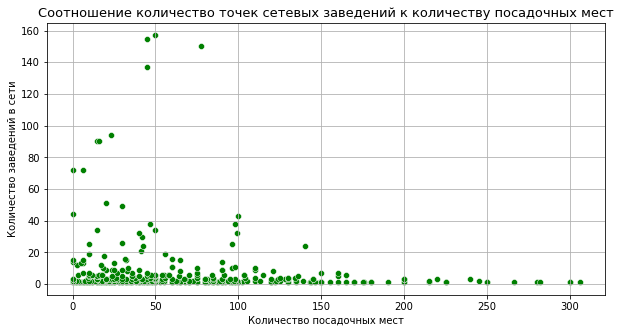

In [44]:
# выделяем только сетевые заведения
chain_group = data[data['chain'] == 'да']

# группируем данные, считаем количество точек и медианное количество посадочных мест
chain_group = (chain_group.groupby('object_name').agg({'id': 'count', 'number': 'median'}).reset_index()
               .sort_values(by='id'))

# рисуем диаграмму
plt.figure(figsize=(10,5))

sns.scatterplot(y='id', x='number', data=chain_group, color = 'green') 

plt.grid(which='major')
plt.title("Соотношение количество точек сетевых заведений к количеству посадочных мест", fontsize=13)
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений в сети')
    
plt.show()

Вероятно, для сетей не очень характерно иметь много заведений или по крайней мере много заведений с одним названием (этот момент мы помним, но не стали править, так как нам не известно относятся ли заведения с немного иным названием именно к этим сетям или нет). В тоже время разброс данных по количеству мест весьма большой. 

В исследовании мы взяли именно медианное значение по количеству мест, чтобы избежать влияние выбросов на расчет среднего. 

#### Исследование геолокации заведений разных видов

Отделим улицы в отдельный датасет, посчитаем количество объектов, которые расположены на данных улицах:

In [16]:
# выделяем улицы из адреса
street = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия', 'квартал']

str_street = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(street))


data['street'] = data['address'].str.extract(str_street)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15281 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15281 non-null  int64 
 1   object_name  15281 non-null  object
 2   chain        15281 non-null  object
 3   object_type  15281 non-null  object
 4   address      15281 non-null  object
 5   number       15281 non-null  int64 
 6   street       14844 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.4+ MB


У нас получилась некоторое количество не заполненных данных, посмотрим, что это за данные, в основном это город Зеленоград, где нет улиц или же поселки. Посчитаем долю таких не заполненных строк:

In [17]:
# рассчитываем долю строк, у которых не получилось вывести улицу
share_street_nan = len(data[data['street'].isna()])/len(data['address'])
print(f'{share_street_nan:.2%}')

2.86%


Процент таких данных не очень большой. Будем иметь ввиду, что у нас есть не заполненные данные по улицам в некоторых строках. 
Сгруппируем данные и посмотрим топ улиц по количеству заведений:

In [18]:
# группируем данные по количеству улице и считаем количество заведений на ней
data_street = data.groupby('street')['id'].count().reset_index(name='counts').sort_values(by='counts', ascending = False)
top_data_street = data_street.head(10)

# выводим топ 10 улиц
top_data_street

,street,counts
1421,проспект Мира,203
1010,Профсоюзная улица,181
685,Ленинградский проспект,170
995,Пресненская набережная,167
399,Варшавское шоссе,164
688,Ленинский проспект,147
1417,проспект Вернадского,128
675,Кутузовский проспект,114
598,Каширское шоссе,111
605,Кировоградская улица,108


Посмотрим на данные в виде диаграммы:

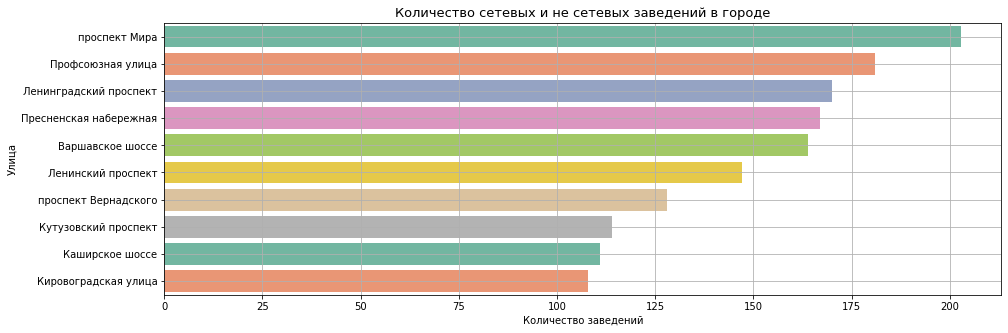

In [19]:
# выводим данные в виде диаграммы
plt.figure(figsize=(15,5))
sns.barplot(y="street", x="counts",
                data=top_data_street, palette="Set2")

plt.grid(which='major')
plt.title("Количество сетевых и не сетевых заведений в городе", fontsize=13)
plt.xlabel('Количество заведений')
plt.ylabel('Улица')
 
plt.show()

Больше всего заведений на проспекте Мира. Также в топ входят Профсоюзная улица и Ленинградский проспект. В топе на всех улицах находится более сотни заведений. 

Посмотрим в каких районах проходят данные улицы. Для этого выгрузим информацию из открытых данных https://opengovdata.ru/:

In [20]:
# загружаем датасет с улицами, районами и округами
url = 'https://drive.google.com/file/d/1ftsRrmFaS8dQrY-ZtcSpEUVmlfMwDq34/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
district = pd.read_csv(path, index_col=0)
district.columns=['street','areaid', 'okrug', 'area']
district.head()

,street,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район


Объединим таблицы:

In [21]:
# объединяем таблицы, чтобы понять в каких районах проходят наши топовые улицы
top_data_street_and_area = top_data_street.merge(district, how='left', on= 'street')
top_data_street_and_area

,street,counts,areaid,okrug,area
0,проспект Мира,203,70,СВАО,Алексеевский район
1,проспект Мира,203,86,СВАО,Ярославский Район
2,проспект Мира,203,78,СВАО,Район Марьина роща
3,проспект Мира,203,79,СВАО,Останкинский район
4,проспект Мира,203,81,СВАО,Район Ростокино
5,проспект Мира,203,82,СВАО,Район Свиблово
6,проспект Мира,203,16,ЦАО,Мещанский район
7,Профсоюзная улица,181,123,ЮЗАО,Академический район
8,Профсоюзная улица,181,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,181,134,ЮЗАО,Район Ясенево


Практически все улицы проходят через несколько районов города. Похоже, что они весьма длинные, поэтому такое большое количество заведений имеет адрес, содержащий название именно такой улицы. Проверим через какие округа чаще всего проходят топовые улицы:

In [22]:
# проверяем в каких округах находятся топовые улицы
okrug_top = (top_data_street_and_area.groupby('okrug')['street'].count().reset_index(name='counts')
             .sort_values(by='counts', ascending = False))
okrug_top

,okrug,counts
4,ЮАО,14
5,ЮЗАО,14
0,ЗАО,7
2,СВАО,6
1,САО,4
3,ЦАО,3


В основном улицы с большим количеством заведений проходят через южный и юго-западный административные округа Москвы. Можно предположить, что эти округа находятся весьма близко к центру Москвы. И в целом в этих округах могут быть просто самые протяженные улицы. 

Посмотрим на каком количестве улиц располагается лишь одно заведение:

In [23]:
# считаем количество улиц с одним заведением
one_place_data_street = data_street[data_street['counts']==1]
one_place_data_street['street'].count()

553

Таких улиц 553, посмотрим в каких районах они чаще всего располагаются и каких округах:

In [24]:
# объединяем данные улиц с районами
# группируем данные по району и количеству улиц в районе
one_data_street_and_area = one_place_data_street.merge(district, how='left', on= 'street')
one_street_area = (one_data_street_and_area.groupby('area')['street'].count().reset_index(name='counts')
             .sort_values(by='counts', ascending = False))

print(colored('Всего районов с одним заведением на улице', 'blue'))
print(one_street_area['area'].count())
print('')
print(colored('Топ 10 районов с одним заведением на улице', 'blue'))
display(one_street_area.head(10))

Всего районов с одним заведением на улице
100

Топ 10 районов с одним заведением на улице


,area,counts
94,Таганский район,27
80,Район Хамовники,26
3,Басманный район,25
95,Тверской район,20
21,Пресненский район,19
51,Район Марьина роща,18
13,Мещанский район,17
22,Район Арбат,17
34,Район Замоскворечье,14
48,Район Лефортово,12


Всего получилось 100 районов, где встречается такая ситуация, когда на улице находится только одно заведение. Самое большое количество таких улиц в Таганском районе. 

Посмотрим распределение таких улиц по округам:

In [25]:
# группируем данные по округам
one_street_okrug = (one_data_street_and_area.groupby('okrug')['street'].count().reset_index(name='counts')
             .sort_values(by='counts', ascending = False))

print(colored('Всего округов с одним заведением на улице', 'blue'))
print(one_street_okrug['okrug'].count())
print('')
print(colored('Округа с одним заведением на улице', 'blue'))
display(one_street_okrug)

Всего округов с одним заведением на улице
10

Округа с одним заведением на улице


,okrug,counts
6,ЦАО,186
0,ВАО,67
4,СВАО,66
3,САО,55
8,ЮВАО,55
1,ЗАО,45
7,ЮАО,29
9,ЮЗАО,28
5,СЗАО,27
2,Зеленоград,6


С большим отрывом победил Центральный административный округ. Вероятно, это связано с тем, что в центре как правило много небольших улочек, поэтому и количество заведений на каждой из улиц не велико. 

#### Исследование количества посадочных мест на улицах с большим количеством заведений

Выделим в основном датасете все заведения, которые находятся на улицах из топа:

In [26]:
# выделяем данные по заведениям, которые находятся на улицах из топа
top_data_street = top_data_street['street']
top_street_num = data.query('street in @top_data_street')
top_street_num.head()

,id,object_name,chain,object_type,address,number,street
151,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
152,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
154,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе


Построим диаграммы распределения количества посадочных мест на топовых улицах:


Варшавское шоссе


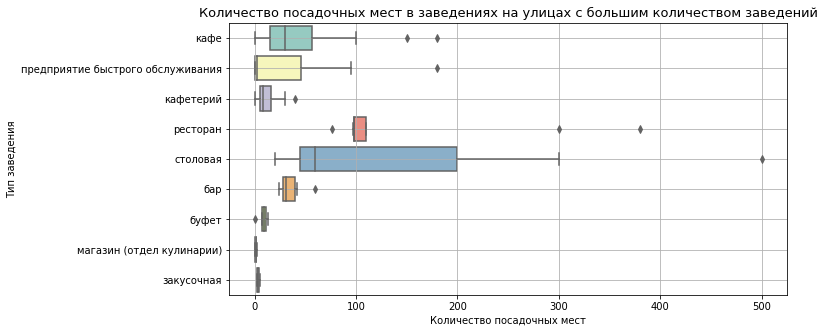


Каширское шоссе


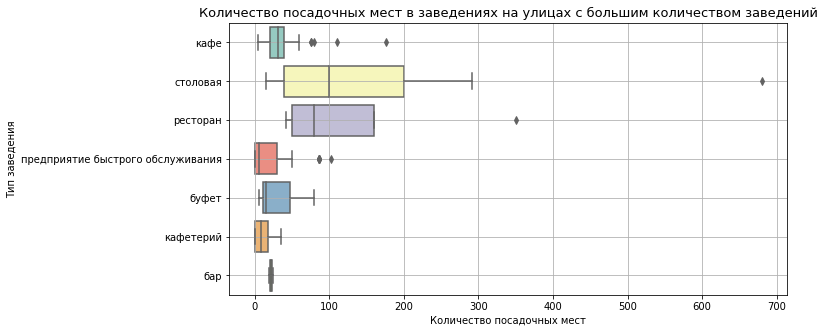


Кировоградская улица


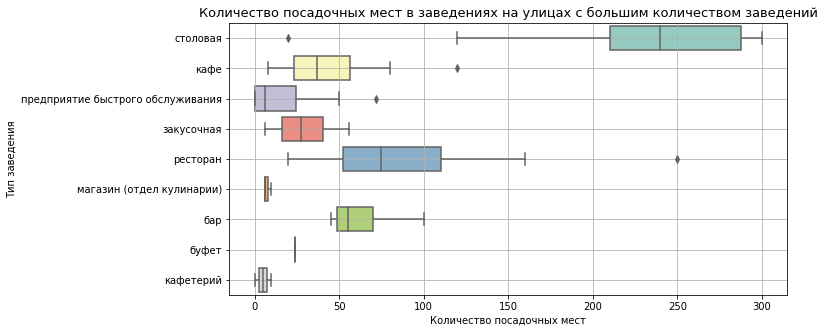


Кутузовский проспект


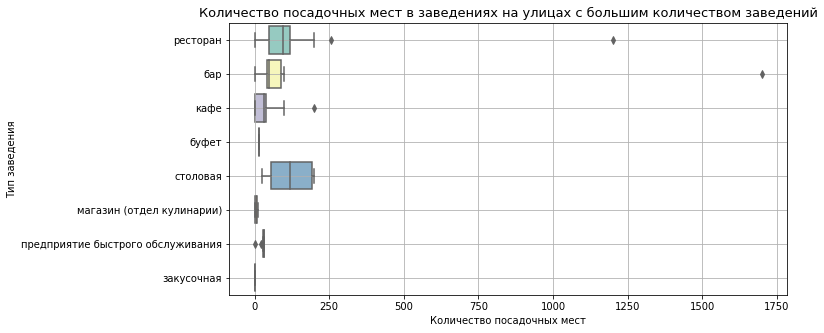


Ленинградский проспект


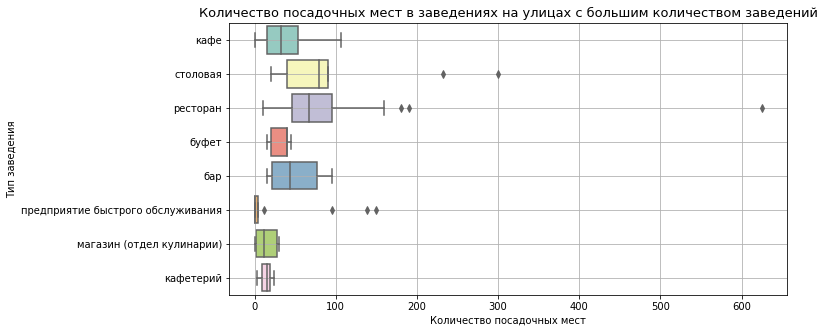


Ленинский проспект


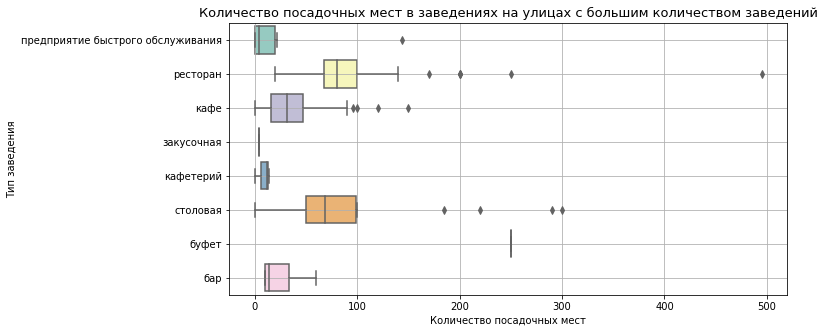


Пресненская набережная


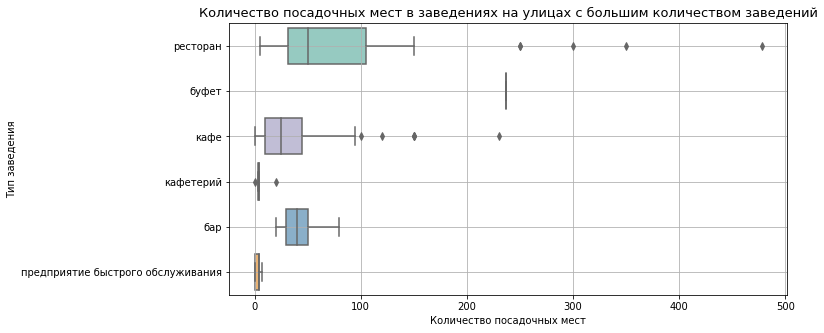


Профсоюзная улица


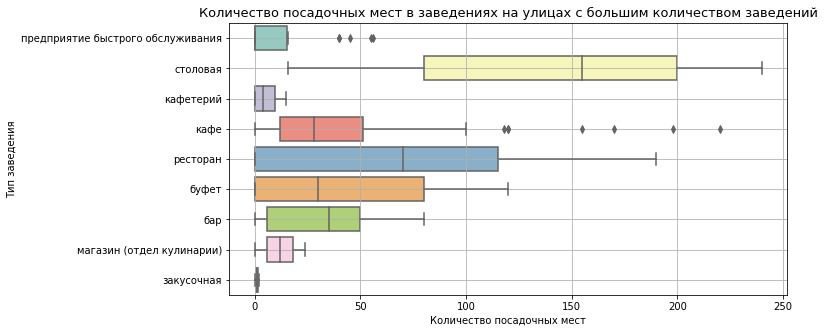


проспект Вернадского


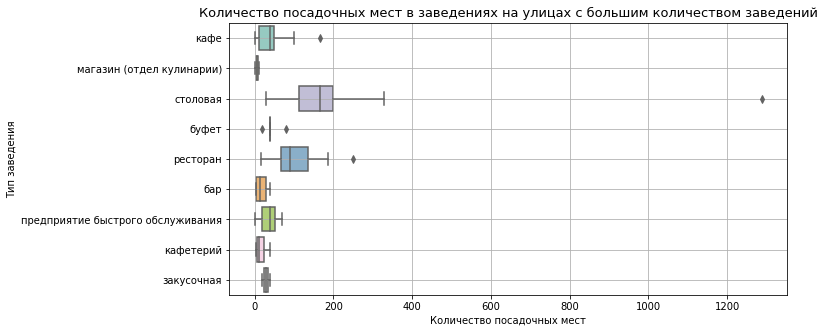


проспект Мира


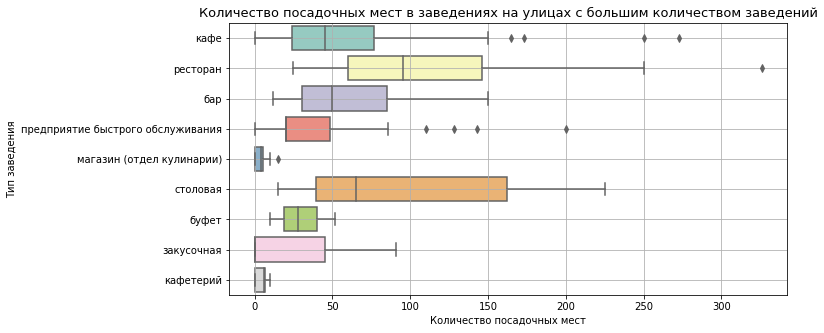

In [27]:
# строим боксплоты по количеству заведений на улицах из топа
for street, street_in_top in top_street_num.groupby('street'):
    print()
    print(street)
    plt.figure(figsize=(10,5))
    sns.boxplot(y='object_type', x='number', data=street_in_top, palette="Set3") 
    plt.grid(which='major')
    plt.title("Количество посадочных мест в заведениях на улицах с большим количеством заведений", fontsize=13)
    plt.xlabel('Количество посадочных мест')
    plt.ylabel('Тип заведения')
    plt.show()

На улицах из топа лидируют столовые по количеству мест. Вероятно, это связано с тем, что в этих районах есть достаточное количество университетов, где обучаются студенты. 

Также большое количество посадочных мест в ресторанах практически на всех топовых улицах.

Посмотрим на какой из улиц больше всего посадочных мест в заведениях, будем смотреть по медианному значению, так как есть выбросы - заведения, где посадочных мест аномально много (стадион на Кутузовском, например):

In [28]:
# группируем данные по названию улицы, считаем среднее количество посадочных мест
top_street_num_gr = (top_street_num.groupby('street')['number'].median().reset_index(name='counts')
                     .sort_values(by='counts', ascending = False))

top_street_num_gr

,street,counts
9,проспект Мира,48
5,Ленинский проспект,45
3,Кутузовский проспект,40
4,Ленинградский проспект,40
8,проспект Вернадского,40
0,Варшавское шоссе,30
2,Кировоградская улица,30
6,Пресненская набережная,30
1,Каширское шоссе,25
7,Профсоюзная улица,24


Проспект Мира вновь в топе, там самое большое медианное значение количества посадочных мест по всем заведениям. Далее идет Ленинский проспект, остальные улицы содержат меньшее медианное количество мест по всем заведениям сети. 

### Вывод

Данные, которые были нам предоставлены для работы, не идеальные. Присутствует разный регистр, названия ресторанов прописаны с использованием "кафе" и без. Было принято решение не менять названия, так как мы не знаем юридической формы этих организаций и их особенностей. 
Нами были удалены только явные дубликаты, которые мы обнаружили при проверке всех столбцов, кроме столбца id. 

При анализе данных мы выяснили, что большая часть заведений общественного питания Москвы - это кафе, как то что мы планируем открыть. Это может говорить о прибыльности такого варианта открытия заведения. 
Причем большинство кафе не являются сетевыми. И в целом в основном в Москве больше именно не сетевых заведений. Можем предположить, что такой формат весьма выгоден. 


При проверке количества посадочных мест видим, что посадочных мест больше в не сетевых заведениях. Однако медианное значение посадочных мест в сетевых и не сетевых заведениях совпадает  ~ 40 мест. 
Больше всего посадочных мест, если смотреть по всем заведениям, в столовых, буфетах и ресторанах (они же лидируют если смотреть на улицы с самым большим количеством заведений). В кафе мест обычно меньше, как раз они очень влияют на медианное значение количество мест в сетевых и не сетевых заведениях. 

Улица с самым большим количеством заведений - проспект Мира, там же самое большое медианное значение посадочных мест по всем типам заведений. 
Из округов больше всего улиц с большим количеством заведений из всех проходят по ЮАО и ЮЗАО. Вероятно, влияет протяженность улиц (улицы с самым большим количеством заведений проходят сразу по нескольким районам) и то, что в данных округах находятся такие объекты как парк Царицыно и Воробьевы горы, которые часто посещают туристы. 


553 улицы имеют только одно заведение общественного питания. Большинство таких улиц находится в Таганский районе и в целом в округе ЦАО (он лидирует с большим отрывом по числу таких улиц). Такая тенденция для этого округа может быть связана с тем, что в исторической части города часто много небольших коротких улочек, чем может располагаться одно заведение на протяжении всей улицы. 

Если мы не предполагаем большую конкуренцию из-за новаторской идее кафе имеет смысл выбирать для открытия ЦАО, ЮАО и ЮЗАО, так как там большое количество заведений и вероятно выше поток клиентов.

Презентация: <https://drive.google.com/file/d/1quJmSrAVZVSIhwqMETSTyxvC-0IqIPxu/view?usp=sharing>